### Data Analysis and Price Prediction of Battery Operated Vehicles using Random Forest Regressor

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Cars.csv")

In [3]:
data.head(10)

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,Opel Ampera-e,Battery Electric Vehicle | 58 kWh,7.3 sec,150 km/h,335 km,173 Wh/km,210 km/h,Front Wheel Drive,5,"€42,990",NaN
1,Renault Kangoo Maxi ZE 33,Battery Electric Vehicle | 31 kWh,22.4 sec,130 km/h,160 km,194 Wh/km,-,Front Wheel Drive,5,NaN,"£31,680"
2,Nissan Leaf,Battery Electric Vehicle | 36 kWh,7.9 sec,144 km/h,220 km,164 Wh/km,230 km/h,Front Wheel Drive,5,"€29,990","£25,995"
3,Audi e-tron Sportback 55 quattro,Battery Electric Vehicle | 86.5 kWh,5.7 sec,200 km/h,375 km,231 Wh/km,600 km/h,All Wheel Drive,5,NaN,"£79,900"
4,Porsche Taycan Turbo S,Battery Electric Vehicle | 83.7 kWh,2.8 sec,260 km/h,390 km,215 Wh/km,860 km/h,All Wheel Drive,4,"€186,336","£138,830"
5,Nissan e-NV200 Evalia,Battery Electric Vehicle | 36 kWh,14.0 sec,123 km/h,165 km,218 Wh/km,170 km/h,Front Wheel Drive,7,"€43,433","£30,255"
6,Volkswagen ID.3 Pure Performance,Battery Electric Vehicle | 45 kWh,8.9 sec,160 km/h,275 km,164 Wh/km,260 km/h,Rear Wheel Drive,5,"€31,960","£27,120"
7,BMW iX3,Battery Electric Vehicle | 74 kWh,6.8 sec,180 km/h,385 km,192 Wh/km,520 km/h,Rear Wheel Drive,5,"€66,300","£58,850"
8,Nissan Leaf e+,Battery Electric Vehicle | 56 kWh,7.3 sec,157 km/h,325 km,172 Wh/km,390 km/h,Front Wheel Drive,5,"€38,350","£30,445"
9,BMW i3 120 Ah,Battery Electric Vehicle | 37.9 kWh,7.3 sec,150 km/h,235 km,161 Wh/km,270 km/h,Rear Wheel Drive,4,"€39,000","£31,305"


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             180 non-null    object
 1   Subtitle         180 non-null    object
 2   Acceleration     180 non-null    object
 3   TopSpeed         180 non-null    object
 4   Range            180 non-null    object
 5   Efficiency       180 non-null    object
 6   FastChargeSpeed  180 non-null    object
 7   Drive            180 non-null    object
 8   NumberofSeats    180 non-null    int64 
 9   PriceinGermany   168 non-null    object
 10  PriceinUK        136 non-null    object
dtypes: int64(1), object(10)
memory usage: 15.6+ KB


In [5]:
print(data.columns)

Index(['Name', 'Subtitle', 'Acceleration', 'TopSpeed', 'Range', 'Efficiency',
       'FastChargeSpeed', 'Drive', 'NumberofSeats', 'PriceinGermany',
       'PriceinUK'],
      dtype='object')


In [6]:
data = data.fillna('0')

In [7]:
data['Manufacturer'] = data['Name'].str.split(' ',1,expand=True)[0]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             180 non-null    object
 1   Subtitle         180 non-null    object
 2   Acceleration     180 non-null    object
 3   TopSpeed         180 non-null    object
 4   Range            180 non-null    object
 5   Efficiency       180 non-null    object
 6   FastChargeSpeed  180 non-null    object
 7   Drive            180 non-null    object
 8   NumberofSeats    180 non-null    int64 
 9   PriceinGermany   180 non-null    object
 10  PriceinUK        180 non-null    object
 11  Manufacturer     180 non-null    object
dtypes: int64(1), object(11)
memory usage: 17.0+ KB


In [9]:
data['Manufacturer']

0         Opel
1      Renault
2       Nissan
3         Audi
4      Porsche
        ...   
175         MG
176      Tesla
177         MG
178       Audi
179       Audi
Name: Manufacturer, Length: 180, dtype: object

In [10]:
PriceinUK=[]
for item in data['PriceinUK']:
    PriceinUK +=[int(item.replace('£','').replace(',',''))]
data['PriceinUK'] = PriceinUK

In [11]:
data['PriceinUK']

0           0
1       31680
2       25995
3       79900
4      138830
        ...  
175         0
176         0
177     26495
178         0
179         0
Name: PriceinUK, Length: 180, dtype: int64

In [12]:
PriceinGermany=[]
for item in data['PriceinGermany']:
    PriceinGermany += [int(item.replace('€','').replace(',',''))]
data['PriceinGermany'] = PriceinGermany

In [13]:
data['PriceinGermany']

0       42990
1           0
2       29990
3           0
4      186336
        ...  
175     40000
176     53560
177         0
178     50900
179     49500
Name: PriceinGermany, Length: 180, dtype: int64

In [14]:
FastChargeSpeed=[]
for item in data['FastChargeSpeed']:
    FastChargeSpeed += [int(item.replace(' km/h','').replace('-','0'))]
data['FastChargeSpeed'] = FastChargeSpeed

In [15]:
Efficiency = []
for item in data['Efficiency']:
    Efficiency += [int(item.replace(' Wh/km',''))]
data['Efficiency'] = Efficiency

In [16]:
data.head()

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK,Manufacturer
0,Opel Ampera-e,Battery Electric Vehicle | 58 kWh,7.3 sec,150 km/h,335 km,173,210,Front Wheel Drive,5,42990,0,Opel
1,Renault Kangoo Maxi ZE 33,Battery Electric Vehicle | 31 kWh,22.4 sec,130 km/h,160 km,194,0,Front Wheel Drive,5,0,31680,Renault
2,Nissan Leaf,Battery Electric Vehicle | 36 kWh,7.9 sec,144 km/h,220 km,164,230,Front Wheel Drive,5,29990,25995,Nissan
3,Audi e-tron Sportback 55 quattro,Battery Electric Vehicle | 86.5 kWh,5.7 sec,200 km/h,375 km,231,600,All Wheel Drive,5,0,79900,Audi
4,Porsche Taycan Turbo S,Battery Electric Vehicle | 83.7 kWh,2.8 sec,260 km/h,390 km,215,860,All Wheel Drive,4,186336,138830,Porsche


In [17]:
Acceleration = []
for item in data['Acceleration']:
    Acceleration += [float(item.replace(' sec',''))]
data['Acceleration'] = Acceleration

In [18]:
TopSpeed = []
for item in data['TopSpeed']:
    TopSpeed += [int(item.replace(' km/h',''))]
data['TopSpeed'] = TopSpeed

In [19]:
Range = []
for item in data['Range']:
    Range += [int(item.replace(' km',''))]
data['Range'] = Range

In [20]:
Subtitle=[]
for item in data['Subtitle']:
    Subtitle+=[float(item.replace('Battery Electric Vehicle | ','').replace(' kWh','').replace('      ',''))]
data['Subtitle']=Subtitle

In [21]:
data = data.rename(columns={'Subtitle':'KWH'})

In [22]:
data.head()

,Name,KWH,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK,Manufacturer
0,Opel Ampera-e,58.0,7.3,150,335,173,210,Front Wheel Drive,5,42990,0,Opel
1,Renault Kangoo Maxi ZE 33,31.0,22.4,130,160,194,0,Front Wheel Drive,5,0,31680,Renault
2,Nissan Leaf,36.0,7.9,144,220,164,230,Front Wheel Drive,5,29990,25995,Nissan
3,Audi e-tron Sportback 55 quattro,86.5,5.7,200,375,231,600,All Wheel Drive,5,0,79900,Audi
4,Porsche Taycan Turbo S,83.7,2.8,260,390,215,860,All Wheel Drive,4,186336,138830,Porsche


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             180 non-null    object 
 1   KWH              180 non-null    float64
 2   Acceleration     180 non-null    float64
 3   TopSpeed         180 non-null    int64  
 4   Range            180 non-null    int64  
 5   Efficiency       180 non-null    int64  
 6   FastChargeSpeed  180 non-null    int64  
 7   Drive            180 non-null    object 
 8   NumberofSeats    180 non-null    int64  
 9   PriceinGermany   180 non-null    int64  
 10  PriceinUK        180 non-null    int64  
 11  Manufacturer     180 non-null    object 
dtypes: float64(2), int64(7), object(3)
memory usage: 17.0+ KB


<AxesSubplot:>

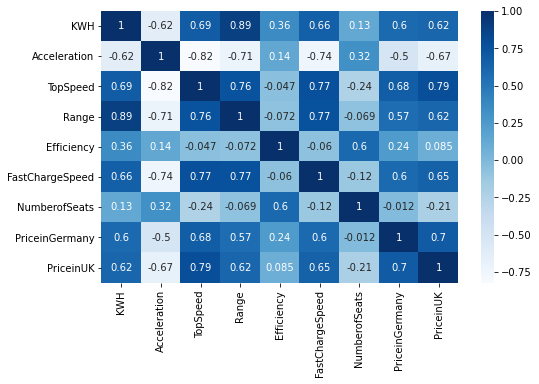

In [24]:
plt.figure(figsize=(8,5))
sns.heatmap(data.corr(),cmap='Blues', annot=True)

<AxesSubplot:xlabel='Drive', ylabel='count'>

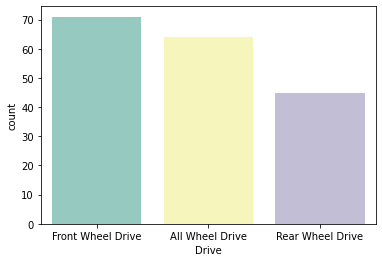

In [25]:
sns.countplot(x='Drive', data=data, palette='Set3')

<AxesSubplot:xlabel='NumberofSeats', ylabel='count'>

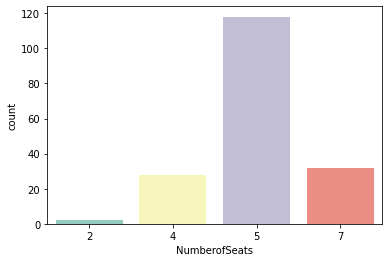

In [26]:
sns.countplot(x='NumberofSeats', data=data, palette='Set3')

<AxesSubplot:xlabel='count', ylabel='Manufacturer'>

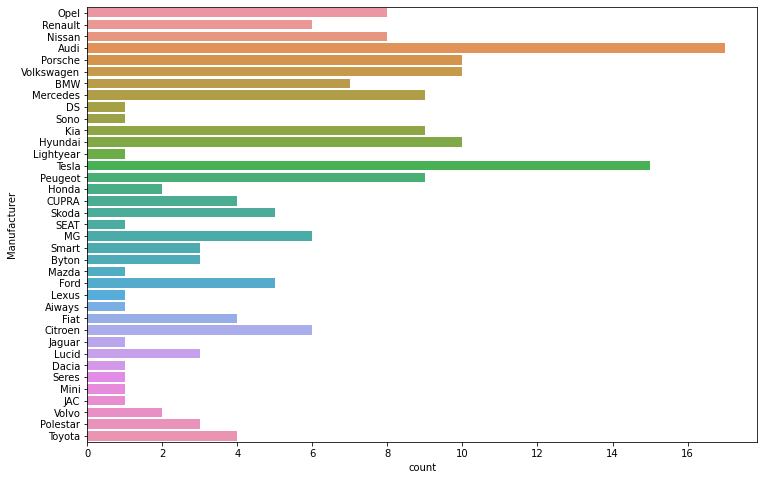

In [27]:
plt.figure(figsize=(12,8))
sns.countplot(y="Manufacturer",data=data)

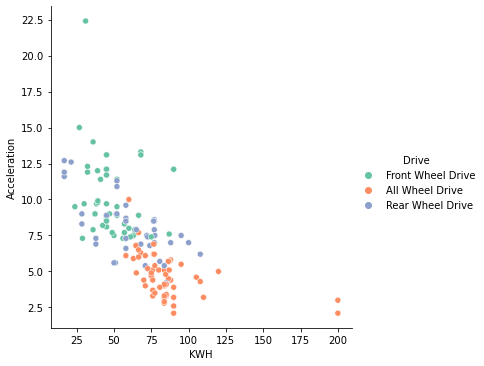

In [28]:
sns.relplot(x='KWH',y='Acceleration', hue='Drive', data=data, palette='Set2')

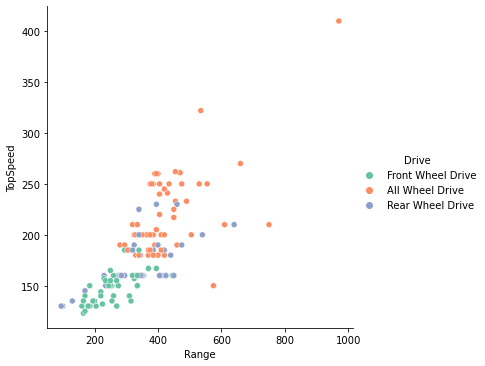

In [29]:
sns.relplot(x='Range',y='TopSpeed',hue='Drive', data=data,palette='Set2')

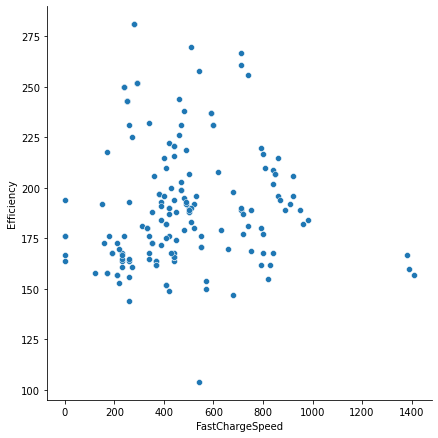

In [30]:
sns.relplot(x="FastChargeSpeed", y="Efficiency", height=6,data=data,palette='Set2')

In [31]:
count = 0
for i in range(0,len(data['PriceinUK'])):
    if (data['PriceinUK'][i] == 0):
        count = count+1;
print(count)

44


In [32]:
pd.options.mode.chained_assignment = None

In [35]:
for i in range(0, len(data['PriceinUK'])):
    if (data['PriceinUK'][i]==0):
        val = data['PriceinUK'].mean()
        data['PriceinUK'][i]=val

In [37]:
import category_encoders as ce
train_data = data

encoder = ce.OrdinalEncoder(cols=['Drive'],return_df = True,mapping=[{'col':'Drive','mapping':{'Front Wheel Drive':1,'Rear Wheel Drive':2,'All Wheel Drive':3}}])
data_train = encoder.fit_transform(train_data)

In [38]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             180 non-null    object 
 1   KWH              180 non-null    float64
 2   Acceleration     180 non-null    float64
 3   TopSpeed         180 non-null    int64  
 4   Range            180 non-null    int64  
 5   Efficiency       180 non-null    int64  
 6   FastChargeSpeed  180 non-null    int64  
 7   Drive            180 non-null    int32  
 8   NumberofSeats    180 non-null    int64  
 9   PriceinGermany   180 non-null    int64  
 10  PriceinUK        180 non-null    int64  
 11  Manufacturer     180 non-null    object 
dtypes: float64(2), int32(1), int64(7), object(2)
memory usage: 16.3+ KB


In [39]:
X= data_train.drop(['Name', 'PriceinGermany','PriceinUK','Manufacturer'], axis=1)
X=X.values

In [40]:
X

array([[ 58. ,   7.3, 150. , ..., 210. ,   1. ,   5. ],
       [ 31. ,  22.4, 130. , ...,   0. ,   1. ,   5. ],
       [ 36. ,   7.9, 144. , ..., 230. ,   1. ,   5. ],
       ...,
       [ 57. ,   7.7, 185. , ..., 340. ,   1. ,   5. ],
       [ 76.6,   6.9, 180. , ..., 470. ,   3. ,   5. ],
       [ 76.6,   8.5, 160. , ..., 520. ,   2. ,   5. ]])

In [41]:
y = data_train['PriceinUK'].values

In [43]:
X.shape

(180, 8)

In [44]:
y.shape

(180,)

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=3)

In [46]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)

In [47]:
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [48]:
y_pred = regressor.predict(X_test)

In [49]:
y_test

array([ 60000,  79900,  45000,  26495,  44990,  27950,  27120,  29740,
        30540,  48000,  45000,  41350, 115860,  30345, 138830,  45940,
        40750,  65195,  25095,  37545,  31500,  31995,  48288,  88193,
        48000,  43464,  49950,  30160,  21620,  48022,  74739,  42985,
        41330,  42000,  39350,  43705,  42276, 139910,  50477,  83580,
        30550,  19795,  25995,  42900,  30255,  49098,  70000,  30375,
        32455,  32305, 110950,  54000,  32445,  40800], dtype=int64)

In [50]:
y_pred

array([ 63649.23      ,  51812.22933333,  50846.91666667,  40604.185     ,
        46207.18      ,  40184.17      ,  29889.74      ,  31841.94      ,
        32974.94416667,  65343.93      ,  46489.45583333,  35756.77      ,
       100717.35      ,  34306.6575    , 101944.7       ,  45112.15900397,
        37472.18875   ,  60871.97666667,  36124.94      ,  41862.98      ,
        36611.48      ,  38199.39      ,  45872.72833333,  90981.25      ,
        49495.73      ,  26527.79333333,  57944.47      ,  28011.33666667,
        32567.6425    ,  43802.53      ,  75268.99333333,  61445.09363095,
        51241.56666667,  51941.84      ,  45071.89      ,  43032.82399603,
        31051.6025    , 102649.9       ,  52160.4       ,  67753.88      ,
        34237.44666667,  33698.2325    ,  40329.29351587,  44397.94      ,
        41774.70945635,  46476.14127381,  82568.19      ,  42353.15047222,
        42353.15047222,  34621.87666667,  99399.95      ,  58320.74      ,
        41862.98      ,  

In [51]:
from sklearn.metrics import mean_absolute_error
print("Mae: ",mean_absolute_error(y_test,y_pred))

Mae:  8533.123614638447


In [52]:
from sklearn.metrics import mean_squared_error
print("MSE: ",mean_squared_error(y_test,y_pred))

MSE:  137709318.7575071


In [53]:
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE:  11734.961387133197
